# Project Method 3: Applied to CCU

This notebook generates the hourly number of arrivals using a Poisson distribution for each hour. This is applied to the example from thr CCU weekday dataset.

## Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sim_tools.datasets import load_banks_et_al_nspp
import sim_tools
sim_tools.__version__

'0.5.0'

## Arrival Profile Data

We will use the `arrival_rate` column as the parameter of the individual Poisson distributions.

In [9]:
ccu_arrival_profile_week = pd.read_csv('./data/weekday_profile.csv')
ccu_arrival_profile_week.round(1)

,t,arrival_rate,mean_iat
0,0,1.1,55.5
1,60,1.3,46.1
2,120,0.9,69.3
3,180,0.9,67.2
4,240,0.7,85.1
5,300,0.7,81.1
6,360,0.7,90.0
7,420,0.5,115.1
8,480,0.4,145.0
9,540,0.4,141.1


## Sampler

A class has been created to simplify the sampling.

In [14]:
class HourPoissonSampler:
    def __init__(self, arrival_profile, random_seed=None):
        self.arrival_profile = arrival_profile
        self.rng = np.random.default_rng(random_seed)

    def sample(self, hour, size=None):
        '''Sample the number of arrivals in a given hour

        Parameters:
        ---------
        hour: int
            Zero indexed hour

        size: int, optional (default=None)
            Number of samples to return. None returns 1.

        Returns:
        -------
        np.array or float
        
        '''
        rate = self.arrival_profile.iloc[hour]['arrival_rate']
        return self.rng.poisson(rate, size=size)
    

## Using the sampler

In [15]:
samples_per_hour = 100_000

# create the sampler and set seed
ph_sampler = HourPoissonSampler(ccu_arrival_profile_week, random_seed=42)

# returns numpy array for hour 1
hr_sample = ph_sampler.sample(0, size=samples_per_hour)
hr_sample.shape

(100000,)

In [16]:
# first 10 results
hr_sample[:10]

array([2, 1, 3, 1, 3, 0, 1, 3, 3, 1])

In [18]:
# mean arrival rate as expected - its our rate parameter og 0.067 per hr.
hr_sample.mean().round(1)

1.1

## Sampling experiment

In [20]:
ph_sampler = HourPoissonSampler(ccu_arrival_profile_week, random_seed=42)

samples = []
for hr in range(len(ccu_arrival_profile_week)):
    hr_sample = ph_sampler.sample(hr, size=samples_per_hour)
    samples.append(hr_sample)



## Plot results

The hour means are our theorectical arrival rates per hour - as expected.

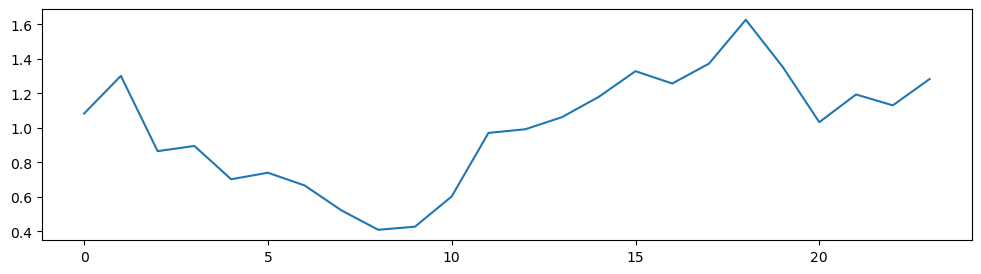

In [21]:
# get hour means
hour_means = np.asarray(samples).mean(axis=1)

# visualise
fig = plt.figure(figsize=(12,3))
ax = fig.add_subplot()

# plot in this case returns a 2D line plot object
_ = ax.plot(hour_means)

In [22]:
pd.DataFrame(hour_means).to_csv("./ccu_method3.csv", index=False)